In [62]:
import pandas as pd

In [63]:
import matplotlib.pyplot as plt

In [64]:
import numpy as np

In [65]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold

from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import average_precision_score

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')

In [67]:
import warnings
warnings.filterwarnings("ignore")

In [68]:
train_RS = pd.read_excel('risk-signal.xlsx')

In [69]:
train_RS.sample(10, random_state=123)

,Default,scorr,good_rate,bad_rate
2109,0,1000.000000,0.958056,0.987500
155,0,901.937881,0.048082,0.258333
1858,0,1000.000000,0.831714,0.970833
1042,0,970.542176,0.441432,0.750000
2135,0,1000.000000,0.970844,0.991667
1380,0,994.924210,0.604604,0.829167
614,0,949.358558,0.236829,0.633333
1341,0,981.987709,0.584655,0.829167
756,0,960.068179,0.301790,0.695833
314,0,927.215927,0.107417,0.437500


In [70]:
train_RS.describe().T

,count,mean,std,min,25%,50%,75%,max
Default,2195.0,0.109339,0.312136,0.000000,0.000000,0.000000,0.000000,1.0
scorr,2195.0,965.453255,40.743648,655.254376,948.622647,975.791926,1000.000000,1000.0
good_rate,2195.0,0.473136,0.296344,0.000000,0.207417,0.466496,0.726598,1.0
bad_rate,2195.0,0.720913,0.241163,0.004167,0.600000,0.775000,0.941667,1.0


In [71]:
train_RS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2195 entries, 0 to 2194
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Default    2195 non-null   int64  
 1   scorr      2195 non-null   float64
 2   good_rate  2195 non-null   float64
 3   bad_rate   2195 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 68.7 KB


In [72]:
train_mean = train_RS.mean()
train_mean

Default        0.109339
scorr        965.453255
good_rate      0.473136
bad_rate       0.720913
dtype: float64

In [73]:
train_RS.fillna(train_mean, inplace=True)

In [78]:
target_RS = 'Default'

In [79]:
train_RS[target_RS].value_counts()

0    1955
1     240
Name: Default, dtype: int64

In [80]:
train_values = train_RS[target_RS]

In [81]:
train_values.shape

(2195,)

In [82]:
train_points = train_RS.drop(target_RS, axis=1)

In [83]:
train_RS.shape

(2195, 4)

In [84]:
train_points.shape

(2195, 3)

In [85]:
from sklearn import linear_model, ensemble

In [86]:
logistic_regression_model = linear_model.LogisticRegression()

In [87]:
logistic_regression_model

LogisticRegression()

In [88]:
random_forest_model = ensemble.RandomForestClassifier(n_estimators=100)

In [89]:
random_forest_model

RandomForestClassifier()

In [90]:
logistic_regression_model.fit(train_points, train_values)

LogisticRegression()

In [91]:
random_forest_model.fit(train_points, train_values)

RandomForestClassifier()

In [92]:
test_RS = pd.read_excel('risk-signal.xlsx')

In [93]:
test_RS.fillna(train_mean, inplace=True)

In [94]:
test_values = test_RS[target_RS]

In [95]:
test_points = test_RS.drop(target_RS, axis=1)

In [96]:
test_points.shape

(2195, 3)

In [97]:
test_predictions_logistic_regression = logistic_regression_model.predict(test_points)

In [98]:
test_predictions_random_forest = random_forest_model.predict(test_points)

In [99]:
pd.value_counts(test_predictions_logistic_regression)

0    2159
1      36
dtype: int64

In [100]:
pd.value_counts(test_predictions_random_forest)

0    1957
1     238
dtype: int64

In [101]:
from sklearn.metrics import accuracy_score

In [102]:
print(accuracy_score(test_values, test_predictions_logistic_regression))
print(accuracy_score(test_values, test_predictions_random_forest))

0.8979498861047835
0.9990888382687927


In [103]:
print(accuracy_score(test_values, np.zeros_like(test_values)))

0.8906605922551253


In [104]:
from sklearn.metrics import confusion_matrix

In [105]:
logistic_regression_confusion_matrix = confusion_matrix(test_values, test_predictions_logistic_regression)
logistic_regression_confusion_matrix = pd.DataFrame(logistic_regression_confusion_matrix)

logistic_regression_confusion_matrix

,0,1
0,1945,10
1,214,26


In [106]:
random_forest_confusion_matrix = confusion_matrix(test_values, test_predictions_random_forest)
random_forest_confusion_matrix = pd.DataFrame(random_forest_confusion_matrix)

random_forest_confusion_matrix

,0,1
0,1955,0
1,2,238


In [107]:
test_probabilities = logistic_regression_model.predict_proba(test_points)

In [108]:
test_probabilities[:5, :]

array([[0.06255576, 0.93744424],
       [0.17471297, 0.82528703],
       [0.1875229 , 0.8124771 ],
       [0.20282145, 0.79717855],
       [0.22101938, 0.77898062]])

In [109]:
test_probabilities = test_probabilities[:, 1]

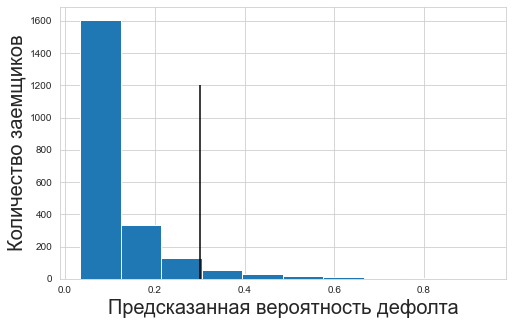

In [110]:
plt.figure(figsize=(8, 5))

plt.hist(test_probabilities, bins=10)
plt.vlines(0.3, 0, 1200)

plt.xlabel('Предсказанная вероятность дефолта', fontsize=20)
plt.ylabel('Количество заемщиков', fontsize=20);

In [111]:
higher_thershold = 0.2
alternative_test_predictions = test_probabilities > higher_thershold

In [112]:
alternative_confusion_matrix = pd.DataFrame(confusion_matrix(test_values, alternative_test_predictions))
alternative_confusion_matrix

,0,1
0,1777,178
1,141,99


In [113]:
higher_thershold = 0.3
alternative_test_predictions = test_probabilities > higher_thershold

In [114]:
false_positive_rates, true_positive_rates, threshold = roc_curve(test_values, test_probabilities)

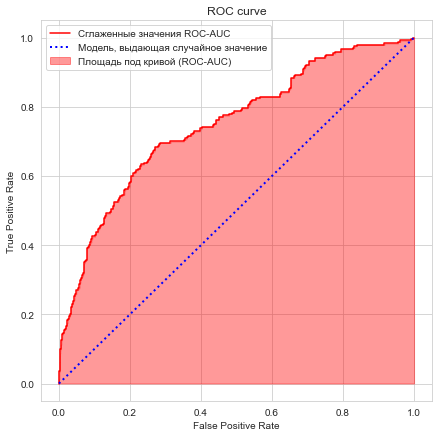

In [121]:
plt.figure(figsize=(7, 7))

plt.plot(false_positive_rates, true_positive_rates, color='r', label='Сглаженные значения ROC-AUC')

plt.plot([0, 1], [0, 1], color='b', lw=2, linestyle=':', label='Модель, выдающая случайное значение')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.fill_between(false_positive_rates, true_positive_rates, step="mid", color='r', alpha=0.4, label='Площадь под кривой (ROC-AUC)')
plt.legend()
plt.show()

In [122]:
from sklearn.metrics import roc_auc_score

In [123]:
roc_auc_value = roc_auc_score(test_values, test_probabilities)

print("ROC-AUC на тестовой выборке:", roc_auc_value) 

ROC-AUC на тестовой выборке: 0.7477770673486787
